In [49]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [50]:
data=pd.read_csv('BTC-USD.csv')

In [51]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [52]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
1488,2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
1490,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444
1491,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465


In [53]:
data['Low'].describe()

count     1492.000000
mean     18277.369294
std      17309.553030
min       3191.303467
25%       6939.701782
50%       9358.137695
75%      31244.488770
max      66382.062500
Name: Low, dtype: float64

In [54]:
data['Return']= data['Adj Close'].pct_change()

In [55]:
np.mean(data['Return'])

0.0014860536040950704

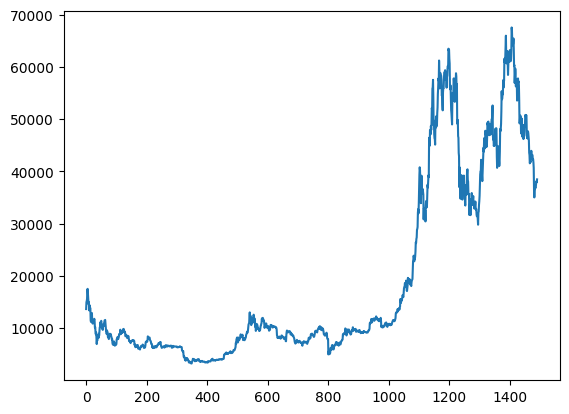

In [56]:
#plotting closing prices
ax1= data['Adj Close'].plot(style=['-'])

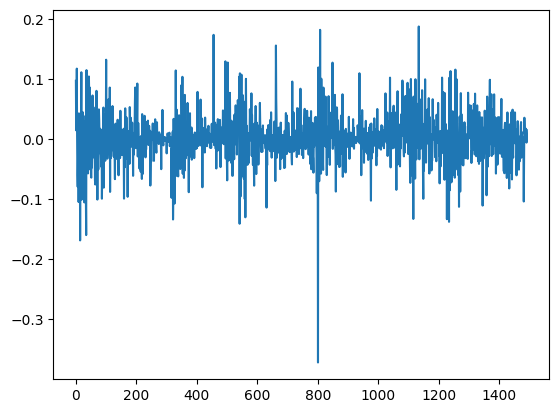

In [57]:
#plotting return prices
ax2= data['Return'].plot(style=['-'])

<Axes: >

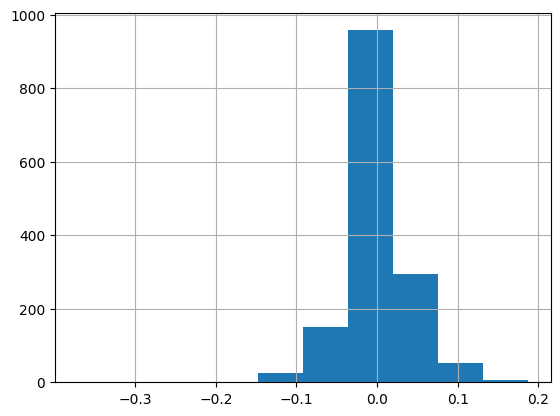

In [58]:
data['Return'].hist()

<Axes: >

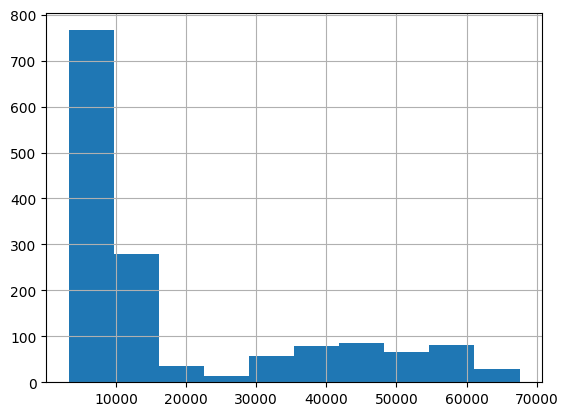

In [59]:
data['Adj Close'].hist()

<Axes: >

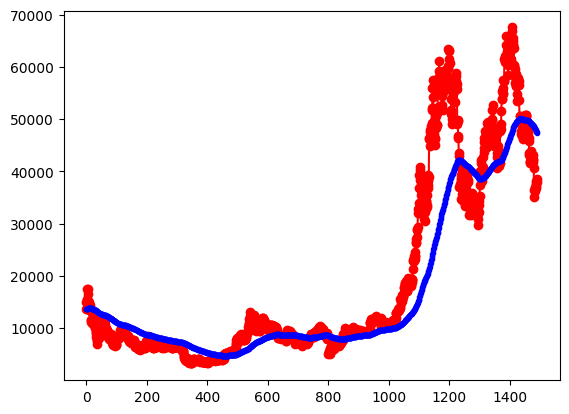

In [60]:
# Exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'data' is your DataFrame with the 'Adj Close' column
model = SimpleExpSmoothing(data['Adj Close']).fit(smoothing_level=0.01, optimized=False)

# Plotting the data and fitted values with valid marker styles
data['Adj Close'].plot(marker='o', color='red', label='Actual Data')
model.fittedvalues.plot(marker='.', color='blue',  label='Fitted Values')



<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

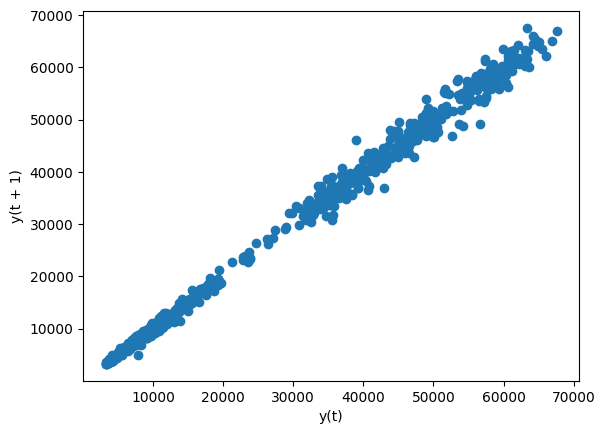

In [61]:
#log plot to check if the series is random
from pandas.plotting import lag_plot

lag_plot(data['Adj Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

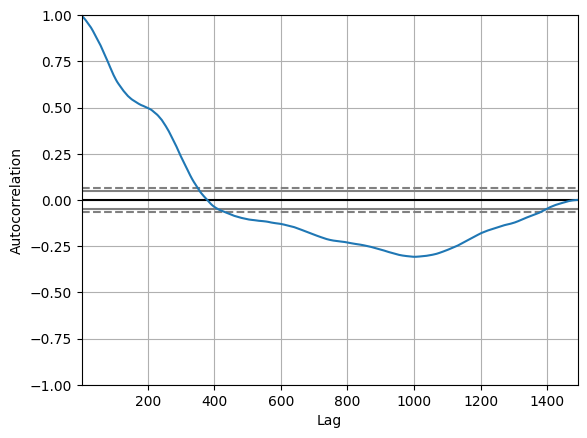

In [62]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Adj Close'])